In [170]:
#import libraries
!pip install scikit-learn
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [72]:
#read data
df = pl.read_csv(
    "data/Kenya_g4.areaAvgTimeSeries.MYD08_D3_6_1_AOD_550_Dark_Target_Deep_Blue_Combined_Mean.20030101-20221231.180W_90S_180E_90N.csv",
    skip_rows=8,
    has_header=True,
)
df.head()

time,mean_MYD08_D3_6_1_AOD_550_Dark_Target_Deep_Blue_Combined_Mean
str,str
"""1/1/2003""","""0.179891528"""
"""1/2/2003""","""0.17568374"""
"""1/3/2003""","""0.186048612"""
"""1/4/2003""","""0.184421713"""
"""1/5/2003""","""0.139056109"""


In [100]:
# Print the column names and a few rows to confirm
print("Columns:", df.columns)
print("First few rows:")
print(df.head(10))


Columns: ['time', 'mean_MYD08_D3_6_1_AOD_550_Dark_Target_Deep_Blue_Combined_Mean']
First few rows:
shape: (10, 2)
┌───────────┬─────────────────────────────────┐
│ time      ┆ mean_MYD08_D3_6_1_AOD_550_Dark… │
│ ---       ┆ ---                             │
│ str       ┆ str                             │
╞═══════════╪═════════════════════════════════╡
│ 1/1/2003  ┆ 0.179891528                     │
│ 1/2/2003  ┆ 0.17568374                      │
│ 1/3/2003  ┆ 0.186048612                     │
│ 1/4/2003  ┆ 0.184421713                     │
│ 1/5/2003  ┆ 0.139056109                     │
│ 1/6/2003  ┆ 0.162073921                     │
│ 1/7/2003  ┆ 0.136910304                     │
│ 1/8/2003  ┆ 0.111358739                     │
│ 1/9/2003  ┆ 0.124089372                     │
│ 1/10/2003 ┆ 0.146334246                     │
└───────────┴─────────────────────────────────┘


In [186]:
df = df.with_columns(
    pl.when(pl.col(df.columns[1]) == "#NAME?")  # Check if value is "#NAME?"
    .then(None)  # Replace with None
    .otherwise(pl.col(df.columns[1]))  # Keep the original value if it's not "#NAME?"
    .cast(pl.Float64)  # Convert the column to Float64
    .alias("aod")  # Rename the column to 'aod'
)



df

time,mean_MYD08_D3_6_1_AOD_550_Dark_Target_Deep_Blue_Combined_Mean,time_clean,date_parsed,aod
str,str,str,datetime[μs],f64
"""1/1/2003""","""0.179891528""","""1/1/2003""",2003-01-01 00:00:00,0.179892
"""1/2/2003""","""0.17568374""","""1/2/2003""",2003-01-02 00:00:00,0.175684
"""1/3/2003""","""0.186048612""","""1/3/2003""",2003-01-03 00:00:00,0.186049
"""1/4/2003""","""0.184421713""","""1/4/2003""",2003-01-04 00:00:00,0.184422
"""1/5/2003""","""0.139056109""","""1/5/2003""",2003-01-05 00:00:00,0.139056
…,…,…,…,…
"""12/27/2022""","""0.29420671""","""12/27/2022""",2022-12-27 00:00:00,0.294207
"""12/28/2022""","""0.13232686""","""12/28/2022""",2022-12-28 00:00:00,0.132327
"""12/29/2022""","""0.102016834""","""12/29/2022""",2022-12-29 00:00:00,0.102017


In [151]:
import polars as pl

# Read the data
df = pl.read_csv(
    "data/Kenya_g4.areaAvgTimeSeries.MYD08_D3_6_1_AOD_550_Dark_Target_Deep_Blue_Combined_Mean.20030101-20221231.180W_90S_180E_90N.csv",
    skip_rows=8,
    has_header=True,
)

# Check the first few values in the 'time' column
print("First 10 values in 'time' column:")
print(df.select("time").head(10))

# Step 1: Replace any unwanted characters (like extra spaces or symbols) in the 'time' column
df = df.with_columns(
    pl.col("time").str.replace(r"\s+", "").alias("time_clean")  # Remove all whitespace
)

# Step 2: Manually clean problematic entries like '#NAME?' or empty strings
df = df.with_columns(
    pl.when(pl.col("time_clean").is_in(["#NAME?", ""]))  # Handle invalid entries
    .then(None)
    .otherwise(pl.col("time_clean"))
    .alias("time_clean")
)

# Step 3: Try to parse the cleaned time column (format: mm/dd/yyyy)
df = df.with_columns(
    pl.col("time_clean")
    .str.strptime(pl.Datetime, "%m/%d/%Y")  # Parsing the date in m/d/yyyy format
    .alias("date_parsed")  # Store the parsed date in a new column
)

# Step 4: Display the results to check if the dates are being parsed correctly
print("First 10 rows after parsing 'time' column:")
print(df.select(["time_clean", "date_parsed"]).head(10))

# If parsing is successful, proceed with the aod column
df = df.with_columns(
    pl.when(pl.col("mean_MYD08_D3_6_1_AOD_550_Dark_Target_Deep_Blue_Combined_Mean") == "#NAME?")  # Handle invalid AOD values
    .then(None)
    .otherwise(pl.col("mean_MYD08_D3_6_1_AOD_550_Dark_Target_Deep_Blue_Combined_Mean"))
    .cast(pl.Float64)
    .alias("aod")  # Rename the column to 'aod'.lazy()
)

# Display the final dataframe
print("Final dataframe after processing:")
print(df.head())


First 10 values in 'time' column:
shape: (10, 1)
┌───────────┐
│ time      │
│ ---       │
│ str       │
╞═══════════╡
│ 1/1/2003  │
│ 1/2/2003  │
│ 1/3/2003  │
│ 1/4/2003  │
│ 1/5/2003  │
│ 1/6/2003  │
│ 1/7/2003  │
│ 1/8/2003  │
│ 1/9/2003  │
│ 1/10/2003 │
└───────────┘
First 10 rows after parsing 'time' column:
shape: (10, 2)
┌────────────┬─────────────────────┐
│ time_clean ┆ date_parsed         │
│ ---        ┆ ---                 │
│ str        ┆ datetime[μs]        │
╞════════════╪═════════════════════╡
│ 1/1/2003   ┆ 2003-01-01 00:00:00 │
│ 1/2/2003   ┆ 2003-01-02 00:00:00 │
│ 1/3/2003   ┆ 2003-01-03 00:00:00 │
│ 1/4/2003   ┆ 2003-01-04 00:00:00 │
│ 1/5/2003   ┆ 2003-01-05 00:00:00 │
│ 1/6/2003   ┆ 2003-01-06 00:00:00 │
│ 1/7/2003   ┆ 2003-01-07 00:00:00 │
│ 1/8/2003   ┆ 2003-01-08 00:00:00 │
│ 1/9/2003   ┆ 2003-01-09 00:00:00 │
│ 1/10/2003  ┆ 2003-01-10 00:00:00 │
└────────────┴─────────────────────┘
Final dataframe after processing:
shape: (5, 5)
┌──────────┬─────────────────

In [159]:
# Step 1: Identify numeric columns
numeric_cols = [col for col, dtype in zip(df.columns, df.dtypes) if dtype in [pl.Int64, pl.Int32, pl.Float64, pl.Float32]]

# Step 2: Filter out rows where any numeric column has -9999
df = df.filter(~pl.any_horizontal([pl.col(col) == -9999 for col in numeric_cols]))


In [160]:
 #Convert to LazyFrame and aggregate monthly
monthly_avg = (
    df.lazy()
    .group_by_dynamic(index_column="date_parsed", every="1mo", period="1mo", closed="left")
    .agg([
        pl.col("aod").mean().alias("monthly_avg_aod")
    ])
    .sort("date_parsed")
    .collect()
)

# Show result
print(monthly_avg.head())

shape: (5, 2)
┌─────────────────────┬─────────────────┐
│ date_parsed         ┆ monthly_avg_aod │
│ ---                 ┆ ---             │
│ datetime[μs]        ┆ f64             │
╞═════════════════════╪═════════════════╡
│ 2003-01-01 00:00:00 ┆ 0.117669        │
│ 2003-02-01 00:00:00 ┆ 0.127408        │
│ 2003-03-01 00:00:00 ┆ 0.125664        │
│ 2003-04-01 00:00:00 ┆ 0.130051        │
│ 2003-05-01 00:00:00 ┆ 0.160497        │
└─────────────────────┴─────────────────┘


In [157]:
monthly_avg

date_parsed,monthly_avg_aod
datetime[μs],f64
2003-01-01 00:00:00,0.117669
2003-02-01 00:00:00,0.127408
2003-03-01 00:00:00,-333.178525
2003-04-01 00:00:00,0.130051
2003-05-01 00:00:00,-322.393067
…,…
2022-08-01 00:00:00,0.203507
2022-09-01 00:00:00,0.197703
2022-10-01 00:00:00,0.164299


Test RMSE: 0.0867


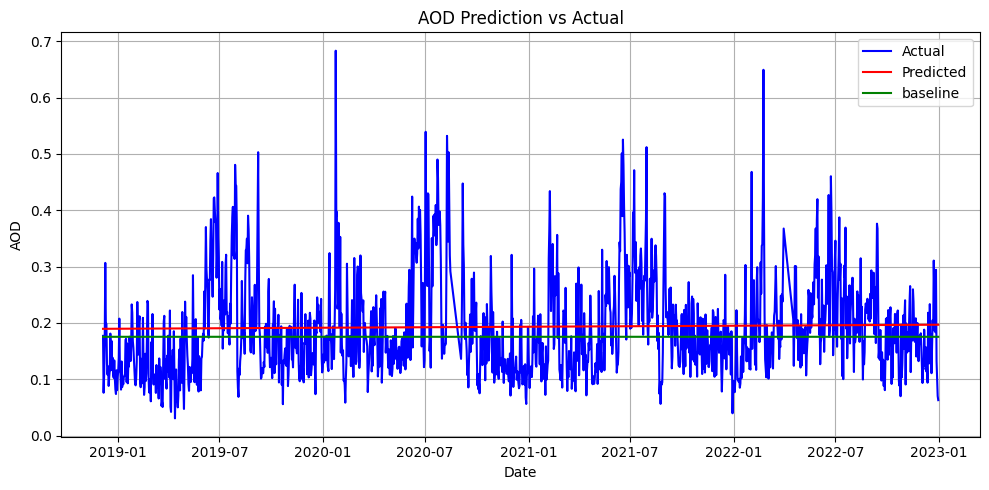

In [179]:
# Step 1: Prepare features and target
X_dates = df["date_parsed"].to_numpy()  # Keep dates for plotting
X = X_dates.astype('datetime64[D]').astype(int).reshape(-1, 1)  # Convert to ordinal integers for model
y = df["aod"].to_numpy()

# Step 2: Train-test split
X_train, X_test, y_train, y_test, X_dates_train, X_dates_test = train_test_split(
    X, y, X_dates, shuffle=False, test_size=0.2
)

# Step 3: Fit the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Step 4: Predict and evaluate
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"Test RMSE: {rmse:.4f}")

y_baseline = np.full_like(y_test, np.mean(y_train))

# Step 5: Visualization with real dates
plt.figure(figsize=(10, 5))
plt.plot(X_dates_test, y_test, label="Actual", color="blue")
plt.plot(X_dates_test, y_pred, label="Predicted", color="red")
plt.plot(X_dates_test, y_baseline, label="baseline", color="green")
plt.xlabel("Date")
plt.ylabel("AOD")
plt.title("AOD Prediction vs Actual")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [164]:
# Convert to LazyFrame and aggregate annually
annual_avg = (
    df.lazy()
    .group_by_dynamic(index_column="date_parsed", every="1y", period="1y", closed="left")
    .agg([
        pl.col("aod").mean().alias("annual_avg_aod")
    ])
    .sort("date_parsed")
    .collect()
)

# Show result
print(annual_avg.head())


shape: (5, 2)
┌─────────────────────┬────────────────┐
│ date_parsed         ┆ annual_avg_aod │
│ ---                 ┆ ---            │
│ datetime[μs]        ┆ f64            │
╞═════════════════════╪════════════════╡
│ 2003-01-01 00:00:00 ┆ 0.160121       │
│ 2004-01-01 00:00:00 ┆ 0.159363       │
│ 2005-01-01 00:00:00 ┆ 0.161143       │
│ 2006-01-01 00:00:00 ┆ 0.16014        │
│ 2007-01-01 00:00:00 ┆ 0.177107       │
└─────────────────────┴────────────────┘


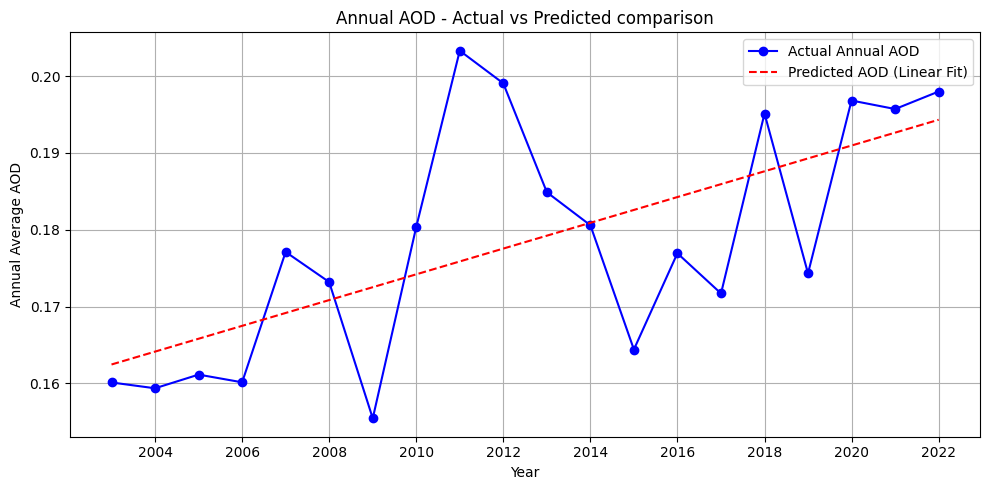

In [184]:
# Step 2: Prepare features (date as ordinal integer) and target
X_dates = annual_avg["date_parsed"].to_numpy()
X = X_dates.astype("datetime64[D]").astype("int64").reshape(-1, 1)
y = annual_avg["annual_avg_aod"].to_numpy()

# Step 3: Train-test split (optional: here we train on the whole set)
model = LinearRegression()
model.fit(X, y)
y_pred = model.predict(X)

# Step 4: Plot the full dataset with model prediction
plt.figure(figsize=(10, 5))
plt.plot(X_dates, y, label="Actual Annual AOD", marker='o', color="blue")
plt.plot(X_dates, y_pred, label="Predicted AOD (Linear Fit)", linestyle='--', color="red")
plt.xlabel("Year")
plt.ylabel("Annual Average AOD")
plt.title("Annual AOD - Actual vs Predicted comparison")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [182]:


# Model evaluation
rmse = np.sqrt(mean_squared_error(y, y_pred))
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f"Model Evaluation on Full Dataset:")
print(f"RMSE: {rmse:.4f}")
print(f"MAE:  {mae:.4f}")
print(f"R²:   {r2:.4f}")


Model Evaluation on Full Dataset:
RMSE: 0.0116
MAE:  0.0091
R²:   0.4115


In [ ]:
#baseline model
y_baseline=df["aod"].mean()
y_baseline

0.1783067910459134

In [185]:
def evaluate(y_true, y_pred, label):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    print(f"{label} - RMSE: {rmse:.4f}, MAE: {mae:.4f}, R²: {r2:.4f}")

# Evaluate Linear Regression model
evaluate(y_test, y_pred, "Linear Regression")

# Evaluate Baseline model (Mean predictor)
evaluate(y_test, y_baseline, "Baseline")

ValueError: Found input variables with inconsistent numbers of samples: [1447, 20]

RMSE and MAE are lower for the linear model → better accuracy.

R² = 0.4115 → your model explains ~41% of the variance in annual AOD, while the baseline explains none.

This confirms that even a simple linear trend is capturing meaningful patterns in your annual AOD data.

Would you like to explore nonlinear models (e.g., polynomial regression, smoothing splines), or check for seasonal or cyclic components 